In [2]:
# Import pandas for data processing
import pandas as pd

In [3]:
# Read the dataset
data = pd.read_csv('studentclusters.csv')
data.head()
data = pd.DataFrame(data)
data.isnull().sum()

marks     0
shours    0
dtype: int64

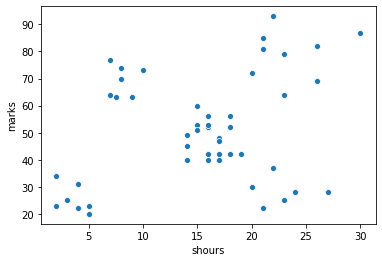

In [4]:
# Visualise the data using Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x ='shours', y = 'marks', data = data)

In [11]:
# Fit and Transform the data for MinMax normalization
X = data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,1))
scaled = scale.fit_transform(X)

In [12]:
# import KMeans for clustering
from sklearn.cluster import KMeans

In [23]:
# Fit the input data. Create labels and get inertia
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 10)
y_pred = kmeans.fit(scaled)

kmeans.cluster_centers_
inertia = kmeans.inertia_
labels = kmeans.labels_


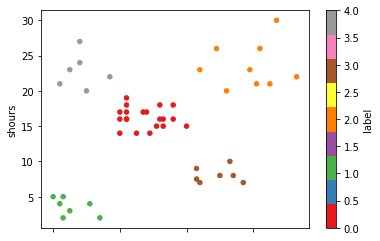

In [36]:
# Visualise the clusters

labels = pd.DataFrame(labels)
df = pd.concat([X,labels], axis = 1)
df = df.rename(columns = {0:'label'})
df.head()

df.plot.scatter(x = 'marks', y = 'shours', c = 'label', colormap = 'Set1')

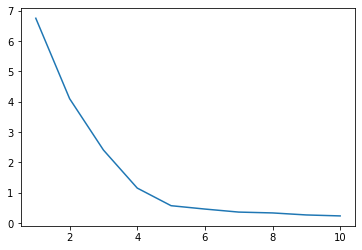

In [47]:
# Elbow method to determine optimum clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 10)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
